# Importing Libraries

In [1012]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [1013]:
#heartdisease_data.csv
heartdiseases=pd.read_csv("heart.csv")
heartdiseases.head(10)

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


In [1014]:
heartdiseases['Trestbps'].value_counts

<bound method IndexOpsMixin.value_counts of 0      140
1      130
2      132
3      142
4      110
      ... 
195    127
196      ?
197    122
198      ?
199    120
Name: Trestbps, Length: 200, dtype: object>

cp=Cerebral Palsy

Trestbps=resting blood pressure

Chol=serum cholesterol

Fbs=fasting blood pressure

Restecg= resting electrocardiographic results;

Thalach=maximum heart rate achieved

Exang=exercise induced angina

Oldpeak=exercise relative to rest

Slope=the slope of the peak

CA=colored by flourosopy

Thal=thalassemia

Num=prediction of heart diseases

In [1015]:
heartdiseases.shape

(200, 14)

In [1016]:
heartdiseases.nunique()

Age          39
Sex           2
CP            4
Trestbps     41
Chol        100
Fbs           3
Restecg       3
Thalach      60
Exang         3
Oldpeak      15
Slope         4
CA            2
Thal          4
Num           5
dtype: int64

There are no columns where all the values are unique or constant values. So all the columns might be important

In [1017]:
heartdiseases.columns.to_series().groupby(heartdiseases.dtypes).groups

{int64: ['Age', 'Sex', 'CP', 'Restecg', 'Num'], object: ['Trestbps', 'Chol', 'Fbs', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal']}

In [1018]:
heartdiseases.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
Num         0
dtype: int64

In [1019]:
                        
for col in heartdiseases:
    print(heartdiseases[col].value_counts())                        

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
124     4
128     4
126     4
144     4
136     4
170     4
134     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
180     2
116     2
112     2
155     2
96      1
146     1
114     1
0       1
156     1
135     1
100     1
172     1
102     1
106     1
178     1
190     1
118     1
127     1
Name: Trestbps, dtype: int64
0      49
?       7
220     4
203     4
258     4
       ..
277     1
237     1
339  

Count the number of '?' values in each column:
    

    Trestbps : 56
           
    Chol : 7
        
    Fbs : 7
        
    Thalach : 53
        
    Exang : 53
        
    Oldpeak : 56
        
    Slope : 102
        
    CA : 198 ( This column has a lot of '?' values. so, this column will be deleted)
        
    Thal : 166
    
    
 Count the number of 0 values in each column:   
 
    Sex : 6 (Can be 0)
    
    Trestbps : 1 (Need to replace 0. Because Trestbps can not be 0)
           
    Chol : 49 (Need to replace 0. Because Chol can not be 0)
        
    Fbs : 125 ( Can be 0)
    
    Restecg : 80 (Can be 0)
        
    Thalach :  No 
        
    Exang : 52 (Can be 0)
        
    Oldpeak : 40 (Can be 0)
        
    Slope : No
        
    CA : 2 ( Here a lot of values are missing. So, it's better to delete the column)
        
    Thal : No
    
    Num : 51 ( Can be 0)
    
    Here, 0 values of these "Trestbps" and "chol" two columns need to be changed.

There are 200 rows in the dataset. There are 198 '?' values present in the 'CA' column which is large. So, let me delete this column. 

# Dropping unexpected column

In [1020]:
heartdiseases.drop(['CA','Thal'],axis=1,inplace=True)

In [1021]:
heartdiseases.describe()

,Age,Sex,CP,Restecg,Num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


<AxesSubplot:>

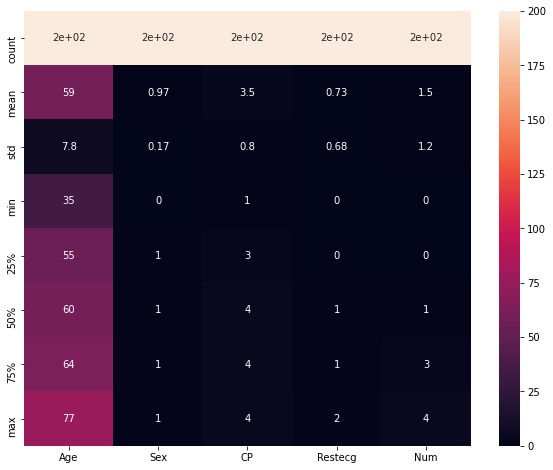

In [1022]:
plt.figure(figsize=(10,8))
sns.heatmap(heartdiseases.describe(),annot=True)

In the numeric variables we can observe that there are no huge differences between the 75 percentile and max. mean and 50 percentile don't have huge difference as well. So, it looks normal. Most probably there are no outliers.

# Fill the '?' values

In [1023]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1024]:
heartdiseases['Trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
124     4
128     4
126     4
144     4
136     4
170     4
134     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
180     2
116     2
112     2
155     2
96      1
146     1
114     1
0       1
156     1
135     1
100     1
172     1
102     1
106     1
178     1
190     1
118     1
127     1
Name: Trestbps, dtype: int64

Firstly, Let me fill all the '?' values with NaN

In [1025]:
#heartdiseases['Ca'] = heartdiseases['CA'].replace(['?'],'NaN')
heartdiseases=heartdiseases.replace(['?'],np.nan)
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


Replace NaN with 0 in the 'Trestbps' and 'Chol' columns

In [1026]:
heartdiseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   CP        200 non-null    int64 
 3   Trestbps  144 non-null    object
 4   Chol      193 non-null    object
 5   Fbs       193 non-null    object
 6   Restecg   200 non-null    int64 
 7   Thalach   147 non-null    object
 8   Exang     147 non-null    object
 9   Oldpeak   144 non-null    object
 10  Slope     98 non-null     object
 11  Num       200 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 18.9+ KB


Here I have filled all the NaN values with string '0'

In [1027]:
heartdiseases["Chol"].fillna("0", inplace = True)

In [1028]:
heartdiseases["Trestbps"].fillna("0", inplace = True)

In [1029]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
170     4
134     4
136     4
128     4
126     4
144     4
124     4
132     3
158     3
152     2
104     2
154     2
125     2
138     2
155     2
180     2
116     2
112     2
146     1
114     1
96      1
156     1
135     1
100     1
172     1
102     1
106     1
190     1
178     1
118     1
127     1
Name: Trestbps, dtype: int64
0      56
258     4
220     4
203     4
218     3
       ..
245     1
272     1
207     1
306  

Here I have converted all the string '0' with value 0

In [1030]:
heartdiseases.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Num'],
      dtype='object')

In [1031]:
heartdiseases["Chol"].replace('0',0,inplace=True)

In [1032]:
heartdiseases["Trestbps"].replace('0',0,inplace=True)

In [1033]:
cols = ['Age', 'Sex', 'CP','Fbs', 'Restecg','Thalach','Exang', 'Oldpeak', 'Slope', 'Thal', 'Num']
heartdiseases[cols].replace('0',0,inplace=True)

KeyError: "['Thal'] not in index"

In [1034]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
128     4
144     4
126     4
124     4
170     4
134     4
136     4
132     3
158     3
104     2
154     2
125     2
152     2
138     2
112     2
116     2
155     2
180     2
100     1
127     1
190     1
146     1
114     1
96      1
156     1
118     1
172     1
102     1
106     1
178     1
135     1
Name: Trestbps, dtype: int64
0      56
220     4
258     4
203     4
219     3
       ..
312     1
349     1
273     1
244  

First I have replaced all the 0 values with missing values 

In [1035]:
#heartdiseases['Chol'].replace(0, np.nan,inplace=True)

In [1036]:
#heartdiseases['Trestbps'].replace(0, np.nan,inplace=True)

Now , fill the 0 with mean value according to SEX column

In [1037]:
heartdiseases

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,0,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,2
198,58,1,4,0,385,1,2,NaN,NaN,NaN,NaN,0


In [1038]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
0      57
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
128     4
144     4
126     4
124     4
170     4
134     4
136     4
132     3
158     3
104     2
154     2
125     2
152     2
138     2
112     2
116     2
155     2
180     2
100     1
127     1
190     1
146     1
114     1
96      1
156     1
118     1
172     1
102     1
106     1
178     1
135     1
Name: Trestbps, dtype: int64
0      56
220     4
258     4
203     4
219     3
       ..
312     1
349     1
273     1
244  

In [1039]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1040]:
x = heartdiseases[heartdiseases['Trestbps']!=0]
x.mean()

Age          5.931469e+01
Sex          9.650350e-01
CP           3.615385e+00
Trestbps              inf
Restecg      7.272727e-01
Thalach               inf
Exang       7.070637e+139
Num          1.545455e+00
dtype: float64

In [1041]:
heartdiseases.dtypes

Age          int64
Sex          int64
CP           int64
Trestbps    object
Chol        object
Fbs         object
Restecg      int64
Thalach     object
Exang       object
Oldpeak     object
Slope       object
Num          int64
dtype: object

In [1042]:
#df1 = pd.DataFrame(heartdiseases.loc[heartdiseases['Trestbps']!= 0])
#df1.value_counts()

# Trestbps

In [1043]:
df=heartdiseases['Trestbps']
df.value_counts()
heartdiseases['Trestbps'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df.dropna(axis=0, how='any',inplace=True) #Delete all the null values
df.value_counts()
np.asarray(df.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

134.6993006993007

# Chol

In [1044]:
df2=heartdiseases['Chol']
df2.value_counts()
heartdiseases['Chol'].replace(0, np.nan,inplace=True)
df2.dropna(axis=0, how='any',inplace=True)
df2.value_counts()
np.asarray(df2.iloc[:], dtype=np.float).mean()

239.56944444444446

Now, I will replace the NaN values with 134.70 for 'Trestbps' column and 239.56 for 'Chol' column

# Replacing

In [1045]:
heartdiseases['Chol'].replace(0, np.nan,inplace=True)
heartdiseases['Trestbps'].replace(0, np.nan,inplace=True)

In [1046]:
values = {'Trestbps': 134.70, 'Chol': 239.56}
heartdiseases.fillna(value=values,inplace=True)

In [1047]:
for col in heartdiseases:
    print(heartdiseases[col].value_counts()) 

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64
1    194
0      6
Name: Sex, dtype: int64
4    131
3     47
2     14
1      8
Name: CP, dtype: int64
134.7    57
120      16
130      15
140      10
150       9
110       9
160       8
122       6
142       5
136       4
128       4
144       4
170       4
124       4
134       4
126       4
158       3
132       3
104       2
155       2
180       2
112       2
125       2
154       2
152       2
116       2
138       2
156       1
135       1
114       1
178       1
100       1
118       1
106       1
102       1
172       1
96        1
146       1
190       1
127       1
Name: Trestbps, dtype: int64
239.56    56
20

Now, There are no NaN values in this two columns

In [1048]:
heartdiseases.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [1049]:
heartdiseases.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      0
Chol          0
Fbs           7
Restecg       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
Num           0
dtype: int64

# Thalach

In [1060]:
df3=heartdiseases['Thalach']
df3.value_counts()
#heartdiseases['Thalach'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df3.dropna(axis=0, how='all',inplace=True) #Delete all the null values
df3.value_counts()
np.asarray(df3.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

59.35

# Oldpeak

In [1061]:
df4=heartdiseases['Oldpeak']
df4.value_counts()
#heartdiseases['Thalach'].replace(0, np.nan,inplace=True) #Replace 0 to NaN values
df4.dropna(axis=0, how='all',inplace=True) #Delete all the null values
df4.value_counts()
np.asarray(df4.iloc[:], dtype=np.float).mean() #Calculate the mean without 0

1.3208333333333333

# Exang

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

# Slope

In [1063]:
heartdiseases['Slope'](method='bfill')

TypeError: 'Series' object is not callable

# Fbs